In [327]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 분류
# from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [328]:
from konlpy.tag import Okt

okt = Okt()
m_list = okt.pos('아버지 가방에 들어가신다.')
print(m_list)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb'), ('.', 'Punctuation')]


In [329]:
# pos - 말뭉치, 품사 튜플형태로 전달
# morphs - 모든 형태소단위로 분리(말뭉치, 어간 추출)
# nouns - 명사 추출


In [330]:
m_list = okt.pos('한글 자연어 처리는 재밌다 이제부터 열심히 해야지 ㅎㅎㅎ',
                 stem=True)
print(m_list)

[('한글', 'Noun'), ('자연어', 'Noun'), ('처리', 'Noun'), ('는', 'Josa'), ('재밌다', 'Adjective'), ('이제', 'Noun'), ('부터', 'Josa'), ('열심히', 'Adverb'), ('하다', 'Verb'), ('ㅎㅎㅎ', 'KoreanParticle')]


In [331]:
m_list = okt.morphs('한글 자연어 처리는 재밌다 이제부터 열심히 해야지 ㅎㅎㅎ',
                 stem=True) # stem : 해야지 -> 하다, 들어가신다 -> 들어가다 로 바꿔줌(동사의 어간 추출)
print(m_list)

['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '하다', 'ㅎㅎㅎ']


In [332]:
m_list = okt.nouns('한글 자연어 처리는 재밌다 이제부터 열심히 해야지 ㅎㅎㅎ')
print(m_list)

['한글', '자연어', '처리', '이제']


In [333]:
df = pd.read_csv('review_data.csv')
df

,score,review,y
0,5,新鮮でおいしいです。너무 맛있어요,1
1,4,녹는다 녹아,1
2,4,좋아요,1
3,5,흠잡을곳 없는 반찬이 정갈합니다,1
4,5,코로나 땜에 걱정했는데 방역수칙도 잘 지키시고 살치실이랑 등심 부드러워서 너무 좋아...,1
...,...,...,...
367,1,핵노맛 식당 분위기가 1점,0
368,5,깔끔친절죤맛,1
369,5,주말엔 점심특선 안 됨ㅠ 안 바쁠 때 가서 그런지 하나하나 잘 구워주시고 육즙 굿 ...,1
370,5,맛있고 직원분들이 친절해서 좋아요. 가성비도 좋음. 생각보다 고기가 많이서 한꺼번에...,1


In [334]:
# 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   score   372 non-null    int64 
 1   review  372 non-null    object
 2   y       372 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.8+ KB


In [335]:
# 0 부정 1 긍정
df['y'].value_counts()

y
1    222
0    150
Name: count, dtype: int64

In [336]:
df.head()

,score,review,y
0,5,新鮮でおいしいです。너무 맛있어요,1
1,4,녹는다 녹아,1
2,4,좋아요,1
3,5,흠잡을곳 없는 반찬이 정갈합니다,1
4,5,코로나 땜에 걱정했는데 방역수칙도 잘 지키시고 살치실이랑 등심 부드러워서 너무 좋아...,1


In [337]:
import re

# 빈공백, 한글을 제외하고 모든 문자는 제거
# 문자열을 정리
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅎ가-힣]') # 빈공백, 한글 반대 인것 선택
    result = hangul.sub('',text)
    return result

In [338]:
# df.columns

In [339]:
df['ko_text'] = df['review'].apply(lambda x: text_cleaning(x))
df['ko_text']

# 한글자 이상의 텍스트를 가지고 데이터 추출
df = df[df['ko_text'].str.len()>0]
df.shape

(372, 4)

In [340]:
# 형태소 단위 추출
from konlpy.tag import Okt

# 형태소 분석 함수 생성
def get_pos(x):
    tagger = Okt()
    pos = tagger.pos(x) # (단어, 품사) 튜플
    pos = [ '{}/{}'.format(word,tag) for word,tag in pos] # pos 튜플형태(단어, 품사)
    return pos

In [341]:
# 형태소 추출 테스트
result = get_pos(df['ko_text'].values[0])
result

['너무/Adverb', '맛있어요/Adjective']

In [342]:
# CountVectorizer : 전체단어에서 각단어에 번호를 부여
from sklearn.feature_extraction.text import CountVectorizer

index_vectorizer = CountVectorizer(tokenizer=lambda x: get_pos(x))
X = index_vectorizer.fit_transform(df['ko_text'].to_list())

/opt/homebrew/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [343]:
# 형태소 분석이 된 단어 총 개수 - 2343개
X.shape

(372, 2343)

In [344]:
print(sorted(index_vectorizer.vocabulary_))

['ㄴ/KoreanParticle', 'ㄷㄷㄷ/KoreanParticle', 'ㄹㅇ/KoreanParticle', 'ㅂㅂ/KoreanParticle', 'ㅅ/KoreanParticle', 'ㅇㅇ/KoreanParticle', 'ㅈㄴ/KoreanParticle', 'ㅈㅁㅌㅌㄱㄹ/KoreanParticle', 'ㅋ/KoreanParticle', 'ㅋㅋ/KoreanParticle', 'ㅋㅋㅋ/KoreanParticle', 'ㅋㅋㅋㅋ/KoreanParticle', 'ㅋㅋㅋㅋㅋ/KoreanParticle', 'ㅎ/KoreanParticle', 'ㅎㅎ/KoreanParticle', 'ㅎㅎㅎ/KoreanParticle', 'ㅎㅎㅎㅎ/KoreanParticle', '가/Josa', '가/Verb', '가게/Noun', '가격/Noun', '가고/Verb', '가고싶지/Verb', '가급적/Adverb', '가기/Noun', '가까/Adjective', '가까히/Adjective', '가나/Noun', '가네요/Verb', '가는/Verb', '가는게/Verb', '가능/Noun', '가능하고/Adjective', '가득/Noun', '가득가득/Adverb', '가득해서/Adjective', '가려고요/Verb', '가려는데/Verb', '가맹/Noun', '가면/Noun', '가본/Verb', '가서/Verb', '가성/Noun', '가세/Noun', '가스/Noun', '가슴/Noun', '가시길/Verb', '가시는거라면/Verb', '가시던데/Verb', '가심/Verb', '가장/Noun', '가정/Noun', '가져가/Verb', '가져다/Verb', '가져다가/Verb', '가져다줄/Verb', '가족/Noun', '가지/Noun', '가진/Verb', '각/Noun', '간/Noun', '간/Suffix', '간곳/Noun', '간다/Noun', '간단하게/Adjective', '간하면/Verb', '갈/Verb', '갈릴/Noun', '갈만/Verb', '갈비

In [345]:
# 확인
print(index_vectorizer.vocabulary_)

{'너무/Adverb': 411, '맛있어요/Adjective': 750, '녹는다/Verb': 430, '녹아/Verb': 431, '좋아요/Adjective': 1888, '흠잡을/Adjective': 2334, '곳/Noun': 178, '없는/Adjective': 1470, '반찬/Noun': 933, '이/Josa': 1640, '정갈합니다/Adjective': 1845, '코로나/Noun': 2075, '땜/Noun': 642, '에/Josa': 1492, '걱정/Noun': 131, '했는데/Verb': 2281, '방역/Noun': 945, '수/Modifier': 1199, '칙/Noun': 2053, '도/Josa': 544, '잘/Verb': 1769, '지키시고/Verb': 1953, '살치실이랑/Verb': 1132, '등심/Noun': 625, '부드러워서/Adjective': 1022, '좋아서/Adjective': 1887, '댓글/Noun': 527, '남깁니다/Verb': 383, '살치/Verb': 1131, '살/Noun': 1127, '미쳤네요/Adjective': 910, '대박/Noun': 515, '입니다/Adjective': 1727, '퀄리티/Noun': 2081, '굳이/Noun': 231, '에요/Josa': 1502, '최고/Noun': 2030, '외식/Noun': 1578, '하기에/Verb': 2179, '딱/Adverb': 631, '좋습니다/Adjective': 1885, '격/Noun': 145, '자체/Noun': 1764, '가/Josa': 17, '다른/Noun': 473, '음식/Noun': 1630, '의/Josa': 1633, '품격/Noun': 2160, '서비스/Noun': 1163, '마인드/Noun': 686, '뭐/Noun': 899, '하나/Noun': 2182, '정말/Noun': 1848, '멋진/Adjective': 830, '식당/Noun': 1247, '이네/Josa'

In [346]:
print(df['ko_text'].values[0])
print(X[0])

너무 맛있어요
  (0, 411)	1
  (0, 750)	1


In [347]:
# 변환기
from sklearn.feature_extraction.text import TfidfTransformer

# TF-IDF 방법으로, 형태소를 벡터 형태 데이터로 변환
tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)

In [348]:
print(X.shape)
print(X[0])

(372, 2343)
  (0, 411)	0.6576785255639858
  (0, 750)	0.7532987169854876


In [349]:
print(X)

  (0, 411)	0.6576785255639858
  (0, 750)	0.7532987169854876
  (1, 430)	0.7071067811865476
  (1, 431)	0.7071067811865476
  (2, 1888)	1.0
  (3, 178)	0.3042004605770822
  (3, 933)	0.4174595892176754
  (3, 1470)	0.43039286289644935
  (3, 1640)	0.19025362148557404
  (3, 1845)	0.5225666594189886
  (3, 2334)	0.4885480536221607
  (4, 131)	0.27027309313102715
  (4, 383)	0.27027309313102715
  (4, 411)	0.14027794721287554
  (4, 527)	0.24019504854904306
  (4, 544)	0.10095305374438543
  (4, 625)	0.23051208095882778
  (4, 642)	0.27027309313102715
  (4, 945)	0.27027309313102715
  (4, 1022)	0.2526785649555473
  (4, 1132)	0.27027309313102715
  (4, 1199)	0.27027309313102715
  (4, 1492)	0.10860241748505198
  (4, 1769)	0.17740824814668021
  (4, 1887)	0.27027309313102715
  :	:
  (371, 1154)	0.17569017317347246
  (371, 1163)	0.24578160535331572
  (371, 1191)	0.14984365240753128
  (371, 1226)	0.12760302633895593
  (371, 1254)	0.17569017317347246
  (371, 1492)	0.21178997858018142
  (371, 1562)	0.1498436524075

In [350]:
target = df['y']
train_input,test_input,train_target,test_target = train_test_split(
    X,target,test_size=0.3,random_state=42
)

In [351]:
print(train_input.shape,test_input.shape)

(260, 2343) (112, 2343)


In [352]:
# 로지스틱 회귀 모델로 구현하시오
from sklearn.linear_model import LogisticRegression

In [353]:
lr = LogisticRegression()
lr.fit(train_input, train_target)

LogisticRegression()

In [354]:
# 과적합
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.9807692307692307
0.8482142857142857


In [355]:
# 1:1 비율을 랜덤 샘플링 수행
# dfidf 수치로 변경된 X의 데이터를 가져오기 위해 index 번호를 저장
positive_random_idx = df[df['y']==1].sample(50,random_state=30).index.to_list()
negative_random_idx = df[df['y']==0].sample(50,random_state=30).index.to_list()

In [356]:
len(positive_random_idx)

50

In [357]:
random_idx = positive_random_idx + negative_random_idx

In [358]:
# 랜덤 100개 데이터셋 나누기
sample_X = X[random_idx,:]
y = df['y'][random_idx]
train_input, test_input, train_target, test_target = train_test_split(
    sample_X,y,test_size=0.3
)
print(train_input.shape,test_input.shape)

(70, 2343) (30, 2343)


In [359]:
lr = LogisticRegression()
lr.fit(train_input, train_target)

LogisticRegression()

In [360]:
# 과대적합 - 데이터를 추가해서 늘려서 다시 테스트
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

1.0
0.6


In [361]:
print(lr.coef_,lr.intercept_)

[[ 0.         -0.08767451  0.17790945 ...  0.          0.
   0.        ]] [0.13541162]


<BarContainer object of 2343 artists>

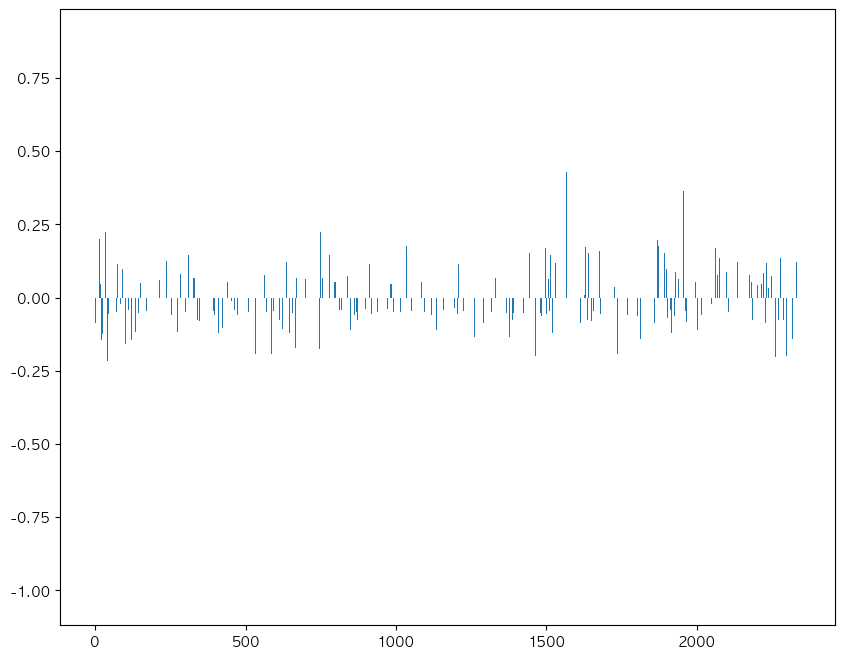

In [362]:
plt.rcParams['figure.figsize']=(10,8)
plt.bar(range(len(lr.coef_[0])),lr.coef_[0])

In [365]:
index_vectorizer.vocabulary_['너무/Adverb']

411

In [366]:
# vectorizer 위치를 바꿈 - 번호로 찾을 수 있도록 위치를 변경
invert_index_vectorizer = {v:k for k,v in index_vectorizer.vocabulary_.items()}

In [367]:
print(invert_index_vectorizer.items())

dict_items([(411, '너무/Adverb'), (750, '맛있어요/Adjective'), (430, '녹는다/Verb'), (431, '녹아/Verb'), (1888, '좋아요/Adjective'), (2334, '흠잡을/Adjective'), (178, '곳/Noun'), (1470, '없는/Adjective'), (933, '반찬/Noun'), (1640, '이/Josa'), (1845, '정갈합니다/Adjective'), (2075, '코로나/Noun'), (642, '땜/Noun'), (1492, '에/Josa'), (131, '걱정/Noun'), (2281, '했는데/Verb'), (945, '방역/Noun'), (1199, '수/Modifier'), (2053, '칙/Noun'), (544, '도/Josa'), (1769, '잘/Verb'), (1953, '지키시고/Verb'), (1132, '살치실이랑/Verb'), (625, '등심/Noun'), (1022, '부드러워서/Adjective'), (1887, '좋아서/Adjective'), (527, '댓글/Noun'), (383, '남깁니다/Verb'), (1131, '살치/Verb'), (1127, '살/Noun'), (910, '미쳤네요/Adjective'), (515, '대박/Noun'), (1727, '입니다/Adjective'), (2081, '퀄리티/Noun'), (231, '굳이/Noun'), (1502, '에요/Josa'), (2030, '최고/Noun'), (1578, '외식/Noun'), (2179, '하기에/Verb'), (631, '딱/Adverb'), (1885, '좋습니다/Adjective'), (145, '격/Noun'), (1764, '자체/Noun'), (17, '가/Josa'), (473, '다른/Noun'), (1630, '음식/Noun'), (1633, '의/Josa'), (2160, '품격/Noun'), (1163, '서비스/Noun'), (686

In [369]:
len(lr.coef_[0])

2343

In [375]:
print(lr.coef_[0][:20])

[ 0.         -0.08767451  0.17790945  0.          0.          0.
  0.          0.          0.          0.07717424  0.08119266  0.
  0.          0.          0.20064166 -0.13557452 -0.04833829 -0.4372092
  0.04687961 -0.10395652]


In [370]:
((value,index) for index,value in enumerate(lr.coef_[0]))

<generator object <genexpr> at 0x334313850>

In [371]:
# 2343개의 기울기값 index 부여, 역순정렬
coef_pos_index = sorted(((value,index) for index,value in enumerate(lr.coef_[0])),reverse=True)

In [372]:
print(coef_pos_index)

[(0.8889477714209618, 2030), (0.7338551433222393, 1888), (0.4955379618260688, 750), (0.4475216217381987, 544), (0.42747770182730777, 1567), (0.4184668349694444, 732), (0.4171539630886601, 760), (0.3623462878665413, 1956), (0.35321278208437323, 159), (0.3071677644197641, 1709), (0.2872237501099373, 1752), (0.2705530552056575, 744), (0.2516096646000987, 652), (0.25008977915019365, 1502), (0.2493285740478222, 178), (0.24603422677631478, 1977), (0.23816929232856202, 604), (0.2363722200216116, 1904), (0.23413633121696575, 761), (0.22856251884440898, 2002), (0.22348834095690417, 749), (0.22348834095690417, 34), (0.21911169208232326, 1941), (0.21911169208232326, 873), (0.217270449196918, 1425), (0.21657916374082165, 156), (0.2136412827415268, 1618), (0.20845427306227862, 2333), (0.2006416557443528, 14), (0.19911911770526922, 1137), (0.19525073008458055, 1870), (0.1948650632160044, 1037), (0.19171549668150148, 1565), (0.19171549668150148, 844), (0.1897857884475689, 140), (0.1785367461340547, 1

In [374]:
# 긍정의 표현중 높은 20개를 출력
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]],coef[0]) # 2030단어, 0.8889477714209618

최고/Noun 0.8889477714209618
좋아요/Adjective 0.7338551433222393
맛있어요/Adjective 0.4955379618260688
도/Josa 0.4475216217381987
완전/Noun 0.42747770182730777
맛있고/Adjective 0.4184668349694444
맛있음/Adjective 0.4171539630886601
직원/Noun 0.3623462878665413
고기/Noun 0.35321278208437323
인정/Noun 0.3071677644197641
있으나/Adjective 0.2872237501099373
맛있당/Adjective 0.2705530552056575
또/Noun 0.2516096646000987
에요/Josa 0.25008977915019365
곳/Noun 0.2493285740478222
짱/Noun 0.24603422677631478
들/Suffix 0.23816929232856202
좋음/Adjective 0.2363722200216116
맛집/Noun 0.23413633121696575
창/Noun 0.22856251884440898


In [377]:
# 부정의 표현중 높은 20개를 출력
for coef in coef_pos_index[-20:]:
    print(invert_index_vectorizer[coef[1]],coef[0])

가서/Verb -0.2180731097221337
교대/Noun -0.22014712398077524
요/Josa -0.2344296226943154
달/Noun -0.23838269669634835
점/Noun -0.24426197351883164
턱/Noun -0.2495007043070918
술안주/Noun -0.2507720208027859
보단/Josa -0.27438862251409074
너무/Adverb -0.2840959442647912
인가/Josa -0.2860613620970467
에/Josa -0.2940782361041134
예요/Josa -0.29470904001128695
제일/Noun -0.3081994029462095
대창/Noun -0.3198098774564583
볶음밥/Noun -0.338352263626729
가/Josa -0.4372091979471157
이에요/Josa -0.5025925878948774
보통/Noun -0.5118265325382171
곱창/Noun -0.5372522536653858
별로/Noun -1.0232903344058606
